In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/data_generator
%ls

/content/drive/MyDrive/data_generator
exmaple.ipynb  generator.py  __pycache__/  README.md  util.py


###1.インスタンスの生成

In [4]:
from generator import Generator

In [5]:
generator = Generator(U=1000,I=1600,K=8, item_num_s=50, noise_rate=0.05, seq_num=1)

using default sigma ...


###2.単語分布（アイテム分布）の確認

[33.333333333333336, 33.333333333333336, 33.333333333333336, 33.333333333333336, 33.333333333333336, 33.333333333333336, 33.333333333333336, 33.333333333333336]


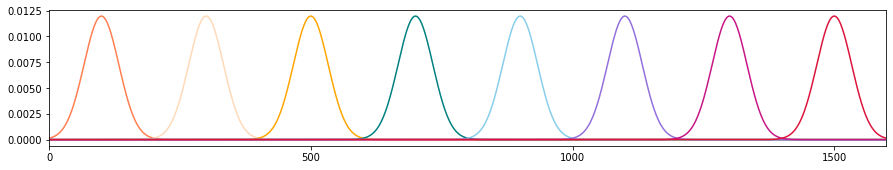

In [6]:
generator.show_item_distribution()

###3.購買履歴の確認

In [7]:
generator.user_topic[0]

{0: 6, 1: 7, 2: 5, 3: 4, 4: 2, 5: 0, 6: 3, 7: 1}

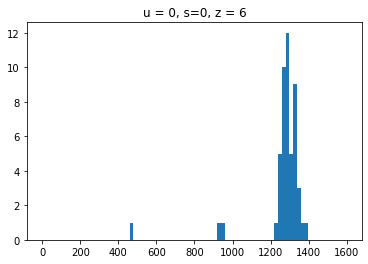

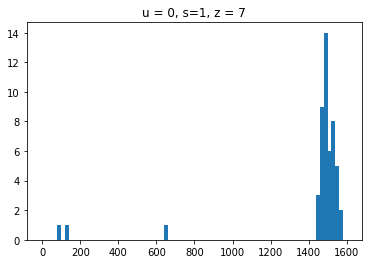

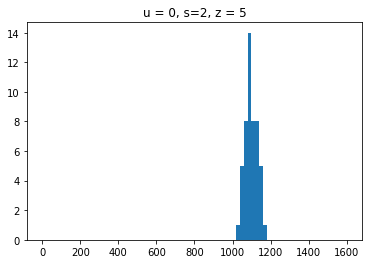

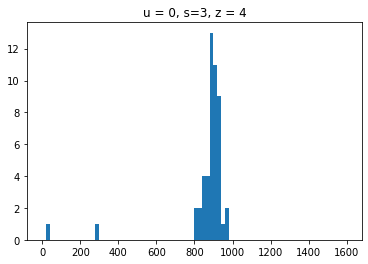

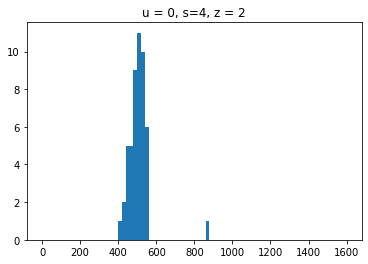

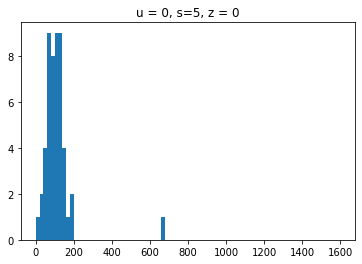

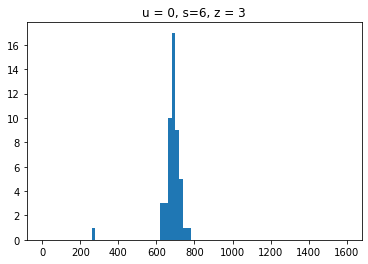

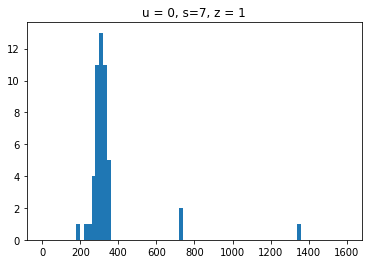

In [8]:
generator.show_user_distribution(0)

###4.モデル入力用のBOWの作成
 - $N_t$：１時刻あたりの閲覧回数（item_num_s の約数とする）

In [9]:
bow = generator.bow

In [10]:
len(bow)

1000

In [12]:
N_t = 25
T = int(len(bow[0]) / N_t)
U = generator.U
I = generator.I

In [14]:
bow_input = np.zeros([U,T,I])
bow_input.shape

(1000, 16, 1600)

In [16]:
for u in range(U):
    for t in range(T):
        bow_ut = bow[u][N_t*t:N_t*(t+1)]
        for i in bow_ut:
            bow_input[u,t,i] += 1

In [18]:
bow_input[0].sum()

800.0